# **Beverage Sales [Classification]**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Loading Dataset from Clustering Results

In [3]:
df = pd.read_csv('dataset\Dataset_classification.csv')
df

,Unnamed: 0,Customer_Type,Category,Unit_Price,Quantity,Discount,Region,KMeans_Cluster
0,0,B2B,Juices,1.87,74,0.10,Niedersachsen,1
1,1,B2B,Soft Drinks,1.87,18,0.05,Bremen,0
2,2,B2B,Alcoholic Beverages,12.04,71,0.15,Thüringen,1
3,3,B2B,Alcoholic Beverages,64.91,91,0.10,Hamburg,1
4,4,B2C,Juices,1.64,4,0.00,Sachsen,0
...,...,...,...,...,...,...,...,...
9995,9995,B2B,Alcoholic Beverages,30.09,99,0.15,Sachsen-Anhalt,1
9996,9996,B2B,Alcoholic Beverages,5.20,56,0.10,Rheinland-Pfalz,1
9997,9997,B2C,Soft Drinks,2.05,14,0.00,Berlin,0
9998,9998,B2C,Juices,3.31,13,0.00,Bremen,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10000 non-null  int64  
 1   Customer_Type   10000 non-null  object 
 2   Category        10000 non-null  object 
 3   Unit_Price      10000 non-null  float64
 4   Quantity        10000 non-null  int64  
 5   Discount        10000 non-null  float64
 6   Region          10000 non-null  object 
 7   KMeans_Cluster  10000 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 625.1+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_9428\73074871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeans_Cluster', data=df, palette='viridis')


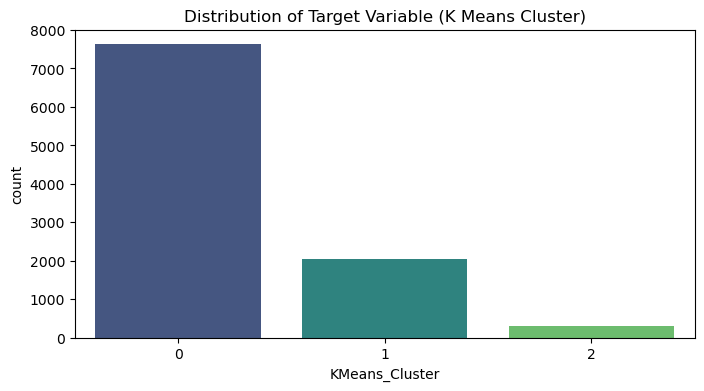

In [5]:
# Visualization of target variable distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='KMeans_Cluster', data=df, palette='viridis')
plt.title('Distribution of Target Variable (K Means Cluster)')
plt.show()

## Preprocessing

### Encoding

In [6]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns that need to be encoded
categorical_columns = ['Customer_Type', 'Category', 'Region']

# Encode categorical columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

### Data Splitting

In [7]:
# Separate features (X) and targets (y)
X = df.drop(columns=['KMeans_Cluster'])
y = df['KMeans_Cluster']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training set and test set to ensure split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 7), y_train=(8000,)
Test set shape: X_test=(2000, 7), y_test=(2000,)


## Build Classification Model

### 1. Decision Tree
Decision Tree is a machine learning algorithm used in classification and regression. The structure of this algorithm is similar to a tree with branches representing decisions based on features.

In [8]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
print("Model training complete.")

Model training complete.


### 2. Random Forest
Random Forest is an ensemble learning algorithm that combines multiple Decision Trees to improve accuracy and reduce the risk of overfitting. Here is a detailed explanation of how Random Forest works and its main parameters.

In [9]:
rf = RandomForestClassifier().fit(X_train, y_train)
print("Model training complete.")

Model training complete.


## Model Evaluation

### Accuracy, Precision, Recall, F1-Score

In [10]:
# Function to evaluate and return the result as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    num_classes = len(np.unique(y_test))

    if num_classes == 2:
        tn, fp, fn, tp = cm.ravel()
    else:
        tn, fp, fn, tp = None, None, None, None

    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),

        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

In [11]:
# Evaluate each model and collect the results
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
}

In [12]:
# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Fill the DataFrame with the results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Show DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT),0.9985,0.980392,0.997602,0.988696
1,Random Forest (RF),0.9980,0.979197,0.990657,0.984792


### Confusion Matrix

In [13]:
# Plot confusion matrix
def plot_confusion_matrix(cm, class_labels, title='Confusion Matrix'):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

cm_dt = results['Decision Tree (DT)']['Confusion Matrix']
cm_rf = results['Random Forest (RF)']['Confusion Matrix']
class_labels = dt.classes_

Confusion Matrix - Decision Tree (DT)


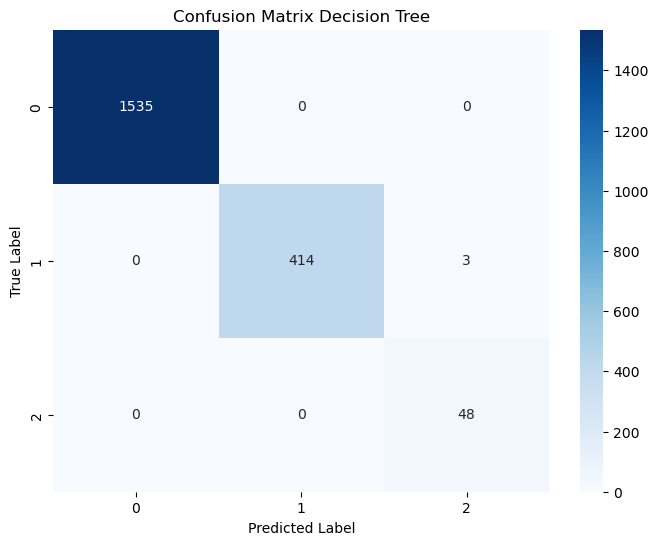

In [14]:
print("Confusion Matrix - Decision Tree (DT)")
plot_confusion_matrix(cm_dt, class_labels, title='Confusion Matrix Decision Tree')

Confusion Matrix - Random Forest (RF)


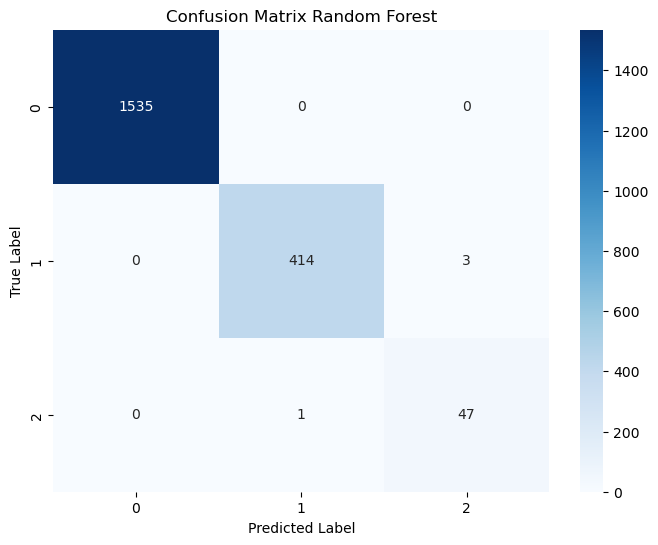

In [15]:
print("Confusion Matrix - Random Forest (RF)")
plot_confusion_matrix(cm_rf, class_labels, title='Confusion Matrix Random Forest')

## Analysis of Classification Model Evaluation Results

### 1. Comparison of Decision Tree and Random Forest models
Based on the evaluation results obtained, the Decision Tree model has a slightly better performance compared to the Random Forest model. Decision Tree recorded an accuracy of 0.9985, a precision of 0.980392, a recall of 0.997602, and an f1-score of 0.988696. While Random Forest has an accuracy of 0.9980, a precision of 0.979197, a recall of 0.990657, and an f1-score of 0.984792. From the confusion matrix, Decision Tree only shows a small prediction error in class 1, namely 3 data that were incorrectly predicted to be class 2. Meanwhile, Random Forest experienced an additional error in class 2, where there was 1 data from class 2 that was incorrectly predicted to be class 1. Thus, it can be concluded that the Decision Tree model shows a slightly better evaluation performance than the Random Forest model in classifying this dataset.

### 2. Identifying the weaknesses of both models
Although both models show very high performance, there are some weaknesses that need to be considered. Based on the confusion matrix, both Decision Tree and Random Forest experience prediction errors in certain classes, especially class 1 and class 2. In Decision Tree, there are three class 1 data that are incorrectly classified into class 2, while in Random Forest, there is an additional class 2 data that is incorrectly predicted to class 1. This shows that the precision or recall for certain classes is not perfect. In addition, very high accuracy, exceeding 99%, has the potential to indicate mild overfitting, especially in the Decision Tree model which is known to be more prone to overfitting. However, because the evaluation was carried out on test data, this overfitting is not too worrying at this time. No indication of underfitting was found because the model's performance on the test data remained very good.

### 3. Recommendations for further action
To improve model performance in the future, several follow-up steps are recommended. First, collecting additional data, especially for classes that have fewer data, such as class 2, is very important to reduce data imbalance that can affect model performance. Second, strengthening model generalization can be done by tuning hyperparameters, such as setting max_depth, n_estimators, or min_samples_split on Random Forest, and applying pruning techniques on Decision Tree to reduce the risk of overfitting. Third, trying other machine learning models such as Gradient Boosting (eg XGBoost or LightGBM) or Support Vector Machine (SVM) can be an alternative to compare better performance. In addition, the application of k-fold cross validation is also recommended to test the stability and generalization of the model. Finally, conducting a feature importance analysis is also useful to find out which features contribute the most to the prediction, so that feature selection or engineering can be carried out to improve the overall accuracy of the model.